In [111]:
import pandas as pd
import numpy as np
np.random.seed(2019)

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate

import xgboost as xgb
# jak nie działa inport xgboosta można skorzystać z poniższego importu a poźniej podmienić
# import sys
# !{sys.executable} -m pip install xgboost

import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df_train = pd.read_csv("../day2/input/train.csv")
df_test = pd.read_csv("../day2/input/test.csv")

df_all = pd.concat([df_train, df_test], sort = True)

In [10]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [11]:
# sprawdzanie, które cechy są int oraz float
df_train.select_dtypes(include=[np.int, np.float]).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [15]:
# sprawdzanie unikalnych wartości w tabeli
# df_all["Sex"].unique()
# przypisywanie wartości numerycznych do danych
pd.factorize(df_all["Sex"])[0]

array([0, 1, 1, ..., 0, 0, 0])

In [16]:
df_all["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
# wykuczenie z danych id pasażerów i informacje o przeżyciu
def get_feats(df):
    feats = df.select_dtypes(include=[np.int64]).columns.values
    black_list = ["PassengerId", "Survived"]
    
    return [feat for feat in feats if feat not in black_list]

def titanic_engineering(df):
    df["sex_cat"] = pd.factorize(df["Sex"])[0]
    df["embarked_cat"] = pd.factorize(df["Embarked"])[0]
    
    return df

def get_models():
    return[
        ("lr", LogisticRegression()),
        ("dt", DecisionTreeClassifier()),
        ("rf", RandomForestClassifier()),
        ("et", ExtraTreesClassifier()),
    ]
    

In [37]:
# wizualizacja wyniku
def plot_result(model_name, reslut, ylim=(0, 1.)):
    mean_train = np.round(np.mean(result["train_score"]),2)
    mean_test = np.round(np.mean(result["test_score"]),2)
    
    plt.title("{0}:cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}".format(model_name,mean_train,mean_test))
    plt.plot(result["train_score"],"r-o", label="train")
    plt.plot(result["test_score"],"r-o", label="test")
    plt.legend(loc="best")
    plt.ylabel("Accuracy")
    plt.xlabel("# of fold")
    plt.ylim(*ylim)
    plt.show()
    
    

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

lr


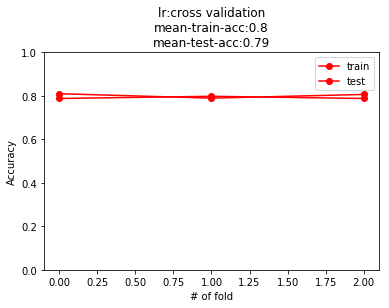

dt


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


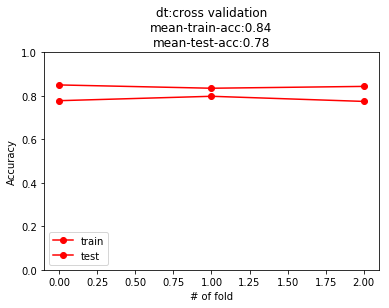

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training score

rf


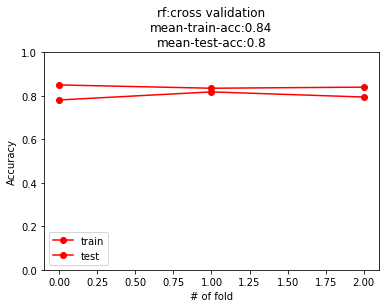

et


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training score

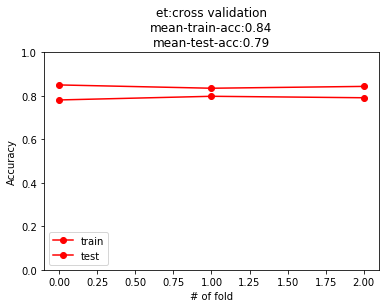

In [38]:
#podział danych z wykorzystaniem cross_validate
df = titanic_engineering(df_train)
get_feats(df)

X = df_train[get_feats(df_train)].values
y = df_train["Survived"].values

for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring="accuracy", cv=3)
    print(model_name)
    
    plot_result(model_name, result)

In [39]:
# predykcja przekazywanie modeli, zapisywanie wynikow
def make_prediction(df_train, df_test, model, output_file_name):
    train = titanic_engineering(df_train)
    test = titanic_engineering(df_test)
    
    feats = get_feats(train)
    
    X_train = train[feats].values
    y_train = train["Survived"].values
    X_test = test[feats]
    
    print(model)
    model.fit(X_train, y_train)
    
    test["Survived"] = model.predict(X_test)
    test[["PassengerId", "Survived"]].to_csv("../day2/output/" + output_file_name, index=False)
    


###### Model linearny

In [40]:
make_prediction(df_train, df_test, LogisticRegression(),"linear2.csv")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


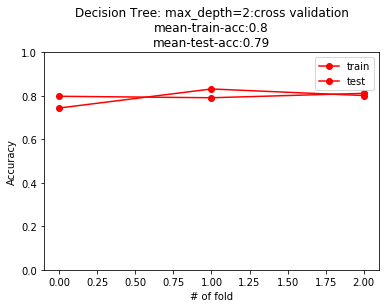

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


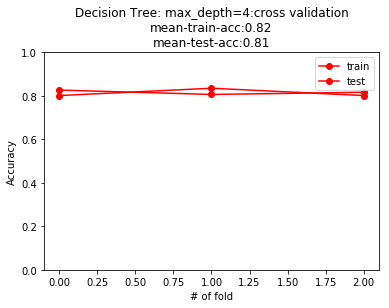

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


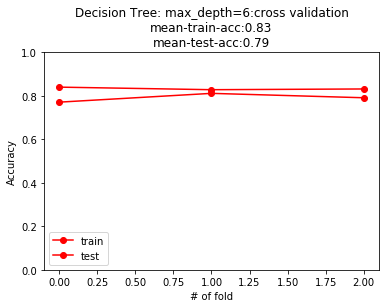

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


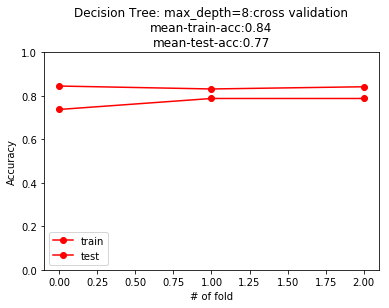

In [41]:
#model ze zmienną głębokość i stałą ilość drzew
for max_depth in range(2,10,2):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    result = cross_validate(model, X, y, scoring="accuracy", cv=3)
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


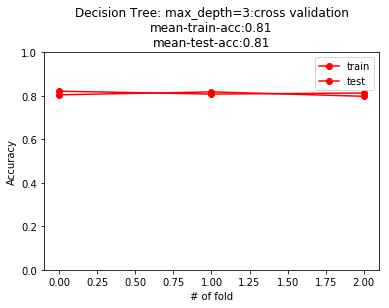

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


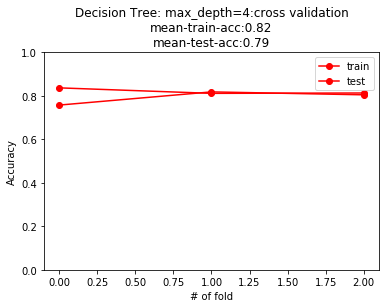

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


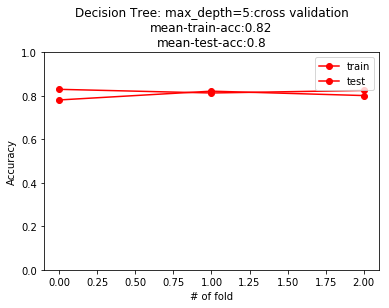

In [42]:
# sprawdzanie wyników co jeden

for max_depth in range(3,6,1):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    result = cross_validate(model, X, y, scoring="accuracy", cv=3)
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)




In [43]:
model = RandomForestClassifier(max_depth=3, n_estimators=15, random_state=2019)
make_prediction(df_train, df_test, model, "rf_md3_ne15.csv")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)


In [44]:
# wydruk dla połączenia df_train i df_test //TEST
print(df_train.shape)
print(df_test.shape)
print(df_all.shape)

(891, 14)
(418, 14)
(1309, 12)


In [46]:
# map z lambda pobierajace jedną wartość i zwracające jedną split dla index 1 dla przecinka i dla index 0 dla kropki zmiana na małą literę i wyciecie spacji

df_train["Name"].map(lambda x: x.split(',')[1].split(".")[0].lower().strip())

0          mr
1         mrs
2        miss
3         mrs
4          mr
5          mr
6          mr
7      master
8         mrs
9         mrs
10       miss
11       miss
12         mr
13         mr
14       miss
15        mrs
16     master
17         mr
18        mrs
19        mrs
20         mr
21         mr
22       miss
23         mr
24       miss
25        mrs
26         mr
27         mr
28       miss
29         mr
        ...  
861        mr
862       mrs
863      miss
864        mr
865       mrs
866      miss
867        mr
868        mr
869    master
870        mr
871       mrs
872        mr
873        mr
874       mrs
875      miss
876        mr
877        mr
878        mr
879       mrs
880       mrs
881        mr
882      miss
883        mr
884        mr
885       mrs
886       rev
887      miss
888      miss
889        mr
890        mr
Name: Name, Length: 891, dtype: object

In [47]:
# rozkład tytułów z wykorzystaniem map
df_test["Name"].map(lambda x: x.split(",")[1].split(".")[0].lower()).value_counts()

 mr        240
 miss       78
 mrs        72
 master     21
 rev         2
 col         2
 ms          1
 dona        1
 dr          1
Name: Name, dtype: int64

In [49]:
df_test["Sex"]

0        male
1      female
2        male
3        male
4      female
5        male
6      female
7        male
8      female
9        male
10       male
11       male
12     female
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25       male
26     female
27       male
28       male
29       male
        ...  
388      male
389      male
390      male
391    female
392      male
393      male
394      male
395    female
396      male
397    female
398      male
399      male
400    female
401      male
402    female
403      male
404      male
405      male
406      male
407      male
408    female
409    female
410    female
411    female
412    female
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [51]:
df_test["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [53]:
df_test["SibSp"].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [54]:
df_train["Sex"]

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [55]:
# łączenie wyników
df_all["Name"].map(lambda x: x.split(",")[1].split(".")[0].lower()).value_counts()

 mr              757
 miss            260
 mrs             197
 master           61
 rev               8
 dr                8
 col               4
 major             2
 mlle              2
 ms                2
 dona              1
 lady              1
 mme               1
 jonkheer          1
 sir               1
 don               1
 the countess      1
 capt              1
Name: Name, dtype: int64

In [57]:
# df_all["Name"]

In [60]:
# przypisywanie wartości liczbowych dla najpopularniejszych tytułów oraz
# utworzenie other dla mniej popularnych
# popular_titles = ["mr", "mrs", "miss", "master", "dr", "rev"]
popular_titles = ["mr", "mrs", "miss", "master"]
df_all["Name"].map(lambda x: x.split(",")[1].split(".")[0].lower().strip()).map(lambda x: x if x
 in popular_titles else "other").value_counts()

mr        757
miss      260
mrs       197
master     61
other      34
Name: Name, dtype: int64

In [63]:
def feature_title(df):
    df["title"] = df["Name"].map(lambda x: x.split(",")[1].split(".")[0].lower().strip())
    popular_titles = ["mr", "mrs", "miss", "master"]
    df["title_norm"] = df["title"].map(lambda x: x if x in popular_titles else "other")
    df["title_norm_cat"] = pd.factorize(df["title_norm"])[0]
     
    return df

In [64]:
df = feature_title(df_all)
df["title_norm"].value_counts()

mr        757
miss      260
mrs       197
master     61
other      34
Name: title_norm, dtype: int64

###### cabin

In [66]:
df_all["Cabin"]

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
388            NaN
389            NaN
390            B24
391            D28
392            NaN
393            NaN
394            NaN
395            C31
396            NaN
397            B41
398            NaN
399            NaN
400             C7
401            NaN
402            NaN
403            NaN
404            D40
405            D38
406            NaN
407            C80
408            NaN
409         

In [65]:
df_all["Cabin"].map(lambda x: "missing" if str(x) =="nan" else x[0]).value_counts()

missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin, dtype: int64

###### Family relationships

In [68]:
df_all.apply(lambda x: x["Parch"] + x["SibSp"], axis=1).value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
dtype: int64

###### Age

In [69]:
print(df_all.shape)

(1309, 15)


In [70]:
df_all.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [72]:
# uzupełnianie brakujących danych
# wartości średnie
df = feature_title(df_all)
df.groupby("title_norm")["Age"].agg([np.mean, np.median])

,mean,median
title_norm,,
master,5.482642,4.0
miss,21.774238,22.0
mr,32.252151,29.0
mrs,36.994118,35.5
other,42.656250,44.5


In [76]:

df = feature_title(df_all)
missing_ages = df.groupby('title_norm')['Age'].agg([np.mean, np.median]).to_dict()['median']
df['Age'] = df.apply( lambda x: x['Age'] if str(x['Age']) != 'nan' else missing_ages[x['title_norm']], axis=1 )

In [77]:
age_bins = [0,1,3,5,9,15,20,40,60,100]
pd.cut(df["Age"], bins=age_bins).astype(object).value_counts()

(20, 40]     824
(40, 60]     196
(15, 20]     133
(9, 15]       33
(60, 100]     33
(5, 9]        26
(3, 5]        23
(0, 1]        22
(1, 3]        19
Name: Age, dtype: int64

###### Fare

In [79]:
# wyliczanie cen biletów
print(df_all.shape)
df_all["Fare"].describe()

(1309, 15)


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

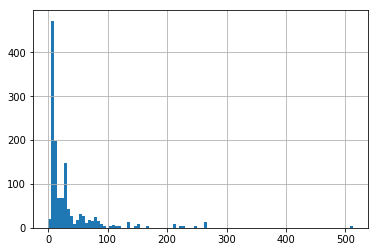

In [80]:
df_all["Fare"].hist(bins=100);

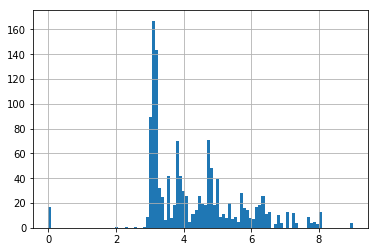

In [81]:
#normalizajca  wykresu przez logarytm 
np.log2(df_all["Fare"] + 1).hist(bins=100)

###### Cabin

In [84]:
df = df_all.copy()
df["Cabin"].unique()
df["cabin_norm"] = df["Cabin"].map(lambda x: "missing" if str(x) == "nan" else x[0])

df.cabin_norm.value_counts()

missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: cabin_norm, dtype: int64

In [92]:
def titanic_engineering(df):
    df['sex_cat'] = pd.factorize( df['Sex'] )[0]
    df['embarked_cat'] = pd.factorize( df['Embarked'] )[0]
    
    df = feature_title(df)
    
    df['cabin_norm'] = df['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] )
    df['cabin_norm_cat'] = pd.factorize( df['cabin_norm'] )[0]
    df['family_size'] = df.apply(lambda x: x['Parch'] + x['SibSp'], axis=1)
    df["single"] = df["family_size"].apply(lambda x: 1 if x == 0 else 0)
    df['fare_log'] = np.log2( df['Fare'] + 1 )
    
    missing_ages = df.groupby('title_norm')['Age'].agg([np.mean, np.median]).to_dict()['median']
    df['Age'] = df.apply( lambda x: x['Age'] if str(x['Age']) != 'nan' else missing_ages[x['title_norm']], axis=1 )
    
    age_bins = [0, 1, 3, 5, 9, 15, 20, 40, 60, 100]
    df['age_bin'] = pd.factorize( pd.cut(df["Age"], bins=age_bins).astype(object) )[0]

    return df
    
    

['Parch', 'Pclass', 'SibSp', 'title_norm_cat', 'sex_cat', 'embarked_cat', 'cabin_norm_cat', 'family_size', 'single', 'age_bin']


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

lr


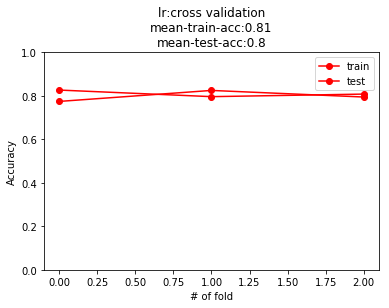

dt


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


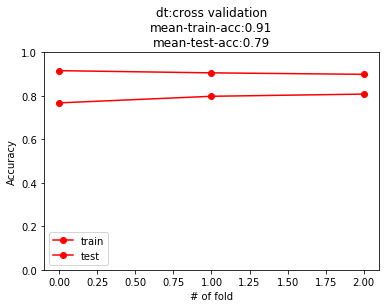

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rf


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


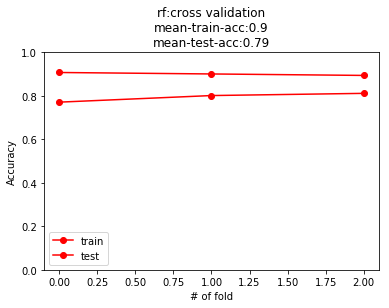

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


et


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


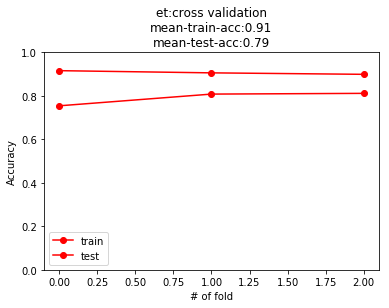

In [93]:
df = titanic_engineering(df_all)
feats = get_feats(df)
print(feats)

train = df[ ~df.Survived.isnull() ]

X = train[ feats ].values
y = train[ 'Survived' ].values

for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    print(model_name)

    plot_result(model_name, result)

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


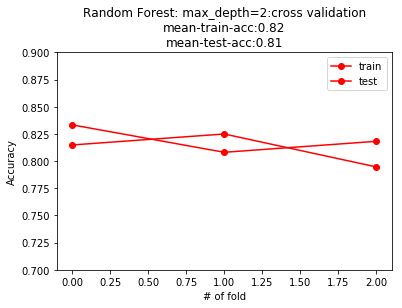

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


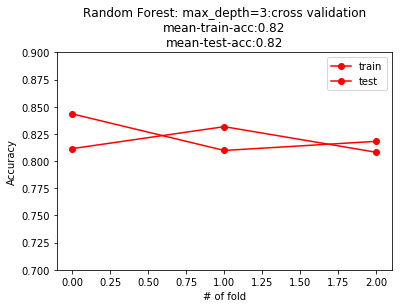

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


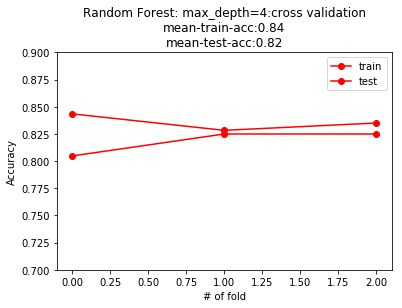

/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


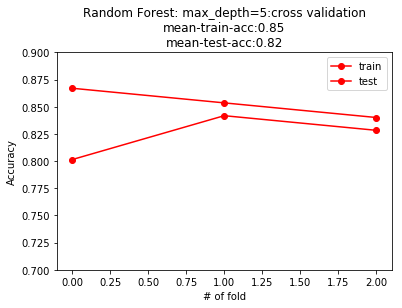

In [99]:
for max_depth in range(2,6,1):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=20,min_samples_leaf=8,random_state=2019)
    result = cross_validate(model, X, y, scoring="accuracy", cv=3)
    plot_result("Random Forest: max_depth=%s" % max_depth, result, ylim=(0.7, 0.9))

In [113]:
df_train, df_test = df_all[ ~df.Survived.isnull() ].copy(), df[ df.Survived.isnull() ].copy()

model = model = RandomForestClassifier(max_depth=4, n_estimators=20, min_samples_leaf=8, random_state=201)
make_prediction(df_train, df_test, model, 'rf_md4_ne20_sl8_fe.csv')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=201, verbose=0, warm_start=False)


###### Ticket

In [101]:
df["Ticket"].value_counts()

CA. 2343             11
CA 2144               8
1601                  8
347077                7
3101295               7
S.O.C. 14879          7
347082                7
PC 17608              7
347088                6
113781                6
19950                 6
382652                6
113503                5
PC 17757              5
220845                5
4133                  5
W./C. 6608            5
349909                5
16966                 5
C.A. 33112            4
36928                 4
PC 17483              4
17421                 4
PC 17755              4
113760                4
C.A. 34651            4
SC/Paris 2123         4
LINE                  4
230136                4
24160                 4
                     ..
PC 17596              1
7935                  1
231945                1
371060                1
239059                1
244270                1
349231                1
323592                1
315089                1
693                   1
SOTON/OQ 3101316

###### konkretne bilety



In [103]:
df_all["Ticket"]

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
              ...        
388                364858
389                349909
390                 12749
391              PC 17592
392             C.A. 2673
393            C.A. 30769
394                315153
395         

In [105]:
# testowy bilet nr 2
df[df.Ticket == "PC 17483"]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,title_norm,title_norm_cat,sex_cat,embarked_cat,cabin_norm,cabin_norm_cat,family_size,single,fare_log,age_bin
527,29.0,C95,S,221.7792,"Farthing, Mr. John",0,528,1,male,0,...,mr,0,0,0,C,1,0,1,7.799471,0
81,67.0,C55 C57,S,221.7792,"Straus, Mr. Isidor",0,973,1,male,1,...,mr,0,0,0,C,1,1,0,7.799471,7
114,63.0,C55 C57,S,221.7792,"Straus, Mrs. Isidor (Rosalie Ida Blun)",0,1006,1,female,1,...,mrs,1,1,0,C,1,1,0,7.799471,7
156,29.0,C97,S,221.7792,"Bird, Miss. Ellen",0,1048,1,female,0,...,miss,2,1,0,C,1,0,1,7.799471,0


###### Last name

In [107]:
df_all["Name"].map(lambda x: x.split(",")[0]).value_counts()

Andersson        11
Sage             11
Goodwin           8
Asplund           8
Davies            7
Brown             6
Skoog             6
Fortune           6
Smith             6
Panula            6
Rice              6
Johnson           6
Ford              6
Carter            6
Palsson           5
Ryerson           5
Thomas            5
Lefebre           5
Kelly             5
Williams          5
Elias             4
Johnston          4
Laroche           4
Johansson         4
Harper            4
Vander Planke     4
Harris            4
Becker            4
Baclini           4
Boulos            4
                 ..
Persson           1
Abrahamsson       1
Thorne            1
Nirva             1
Jonkoff           1
Harrison          1
Lang              1
Silven            1
Fischer           1
Finoli            1
Adahl             1
Niklasson         1
Osman             1
Razi              1
Chaudanson        1
Partner           1
Weir              1
Harbeck           1
Allum             1


In [108]:
# wyszukiwanie  po konkretnym nawisku
df_all[df_all.Name.map(lambda x: x.split(",")[0] == "Andersson")]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,title_norm,title_norm_cat,sex_cat,embarked_cat,cabin_norm,cabin_norm_cat,family_size,single,fare_log,age_bin
13,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,...,mr,0,0,0,missing,0,6,0,5.012345,0
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,...,miss,2,1,0,missing,0,6,0,3.157852,5
119,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,...,miss,2,1,0,missing,0,6,0,5.012345,2
146,27.0,NaN,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,147,3,male,0,...,mr,0,0,0,missing,0,0,1,3.136815,0
541,9.0,NaN,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,542,3,female,4,...,miss,2,1,0,missing,0,6,0,5.012345,6
542,11.0,NaN,S,31.2750,"Andersson, Miss. Sigrid Elisabeth",2,543,3,female,4,...,miss,2,1,0,missing,0,6,0,5.012345,3
610,39.0,NaN,S,31.2750,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,611,3,female,1,...,mrs,1,1,0,missing,0,6,0,5.012345,0
813,6.0,NaN,S,31.2750,"Andersson, Miss. Ebba Iris Alfrida",2,814,3,female,4,...,miss,2,1,0,missing,0,6,0,5.012345,6
850,4.0,NaN,S,31.2750,"Andersson, Master. Sigvard Harald Elias",2,851,3,male,4,...,master,3,0,0,missing,0,6,0,5.012345,4
214,38.0,NaN,S,7.7750,"Andersson, Miss. Ida Augusta Margareta",2,1106,3,female,4,...,miss,2,1,0,missing,0,6,0,3.133399,0


In [109]:
df_all[df_all.Name.map(lambda x: x.split(",")[0] == "Fortune")]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,title_norm,title_norm_cat,sex_cat,embarked_cat,cabin_norm,cabin_norm_cat,family_size,single,fare_log,age_bin
27,19.0,C23 C25 C27,S,263.0,"Fortune, Mr. Charles Alexander",2,28,1,male,3,...,mr,0,0,0,C,1,5,0,8.044394,5
88,23.0,C23 C25 C27,S,263.0,"Fortune, Miss. Mabel Helen",2,89,1,female,3,...,miss,2,1,0,C,1,5,0,8.044394,0
341,24.0,C23 C25 C27,S,263.0,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,...,miss,2,1,0,C,1,5,0,8.044394,0
438,64.0,C23 C25 C27,S,263.0,"Fortune, Mr. Mark",4,439,1,male,1,...,mr,0,0,0,C,1,5,0,8.044394,7
53,28.0,C23 C25 C27,S,263.0,"Fortune, Miss. Ethel Flora",2,945,1,female,3,...,miss,2,1,0,C,1,5,0,8.044394,0
69,60.0,C23 C25 C27,S,263.0,"Fortune, Mrs. Mark (Mary McDougald)",4,961,1,female,1,...,mrs,1,1,0,C,1,5,0,8.044394,1


/Users/charlottemoriarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


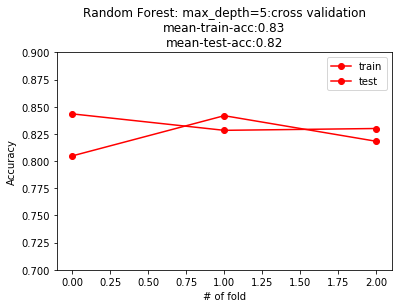

In [114]:

model = xgb.XGBClassifier(max_depth=3, n_estimators=15, subsample=0.8, random_state=2019)
result = cross_validate(model, X, y, scoring='accuracy', cv=3)
plot_result("Random Forest: max_depth=%s" % max_depth, result, ylim=(0.7, 0.9))